In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Task 1
------------
Apply data analysis on 'Salaries.csv' dataset.<br/>
here is some questions to think about 

### What is the average BasePay ?

In [38]:
df = pd.read_csv('datasets/Salaries.csv')

In [39]:
df['BasePay'].mean()

66325.44884050643

### What is the highest amount of OvertimePay in the dataset ?

In [5]:
df['OvertimePay'].max()

245131.88

### What is the job title of JOSEPH DRISCOLL ? 
Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).

In [6]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [7]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle'][24]

'CAPTAIN, FIRE SUPPRESSION'

### How much does JOSEPH DRISCOLL make (including benefits)?

In [8]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits'][24]

270324.91

### What is the name of highest paid person (including benefits)?

In [9]:
df.loc[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]['EmployeeName'][0]

'NATHANIEL FORD'

### What is the name of lowest paid person (including benefits)? 

In [10]:
df.loc[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]['EmployeeName'][148653]

'Joe Lopez'

### What was the average (mean) BasePay of all employees per year? (2011-2014) ?

In [11]:
df.groupby(['EmployeeName', 'Year'])['BasePay'].mean()

EmployeeName           Year
A BERNARD FATOOH       2011    19969.37
A Bernard  Fatooh      2013    23908.50
A Bernard Fatooh       2012    18472.35
                       2014    24061.35
A ELIZABETH MARCHASIN  2011    23591.80
                                 ...   
Zuna T Luu             2013    55026.00
                       2014    54703.00
Zuri  Jones            2013    71986.90
Zuri Jones             2012    86588.52
                       2014    66667.54
Name: BasePay, Length: 141061, dtype: float64

In [12]:
pd.pivot_table(df, index='EmployeeName', columns='Year', values='BasePay')

Year,2011,2012,2013,2014
EmployeeName,,,,
A BERNARD FATOOH,19969.37,NaN,NaN,NaN
A Bernard Fatooh,NaN,NaN,23908.5,NaN
A Bernard Fatooh,NaN,18472.35,NaN,24061.35
A ELIZABETH MARCHASIN,23591.80,NaN,NaN,NaN
A JAMIL NIAZI,69058.19,NaN,NaN,NaN
...,...,...,...,...
Zun Jin Zhang He,NaN,51492.80,NaN,53732.21
Zuna Luu,NaN,51502.86,NaN,NaN
Zuna T Luu,NaN,NaN,55026.0,54703.00


### How many unique job titles are there?

In [13]:
df['JobTitle'].nunique()

2159

In [14]:
df['JobTitle'].value_counts().count()

2159

### What are the top 5 most common jobs?

In [15]:
df['JobTitle'].value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)

In [16]:
df_2013 = df[df['Year'] == 2013]
(df_2013.groupby('JobTitle')['JobTitle'].count() == 1).sum()

202

In [17]:
((df['Year']==2013) & (df.groupby(['JobTitle','Year'])['JobTitle'].transform('size')==1)).sum()

202

### How many people have the word Chief in their job title? (This is pretty tricky)

In [18]:
#=== capital (case sensitive)===
df.query('JobTitle.str.contains("Chief")', engine='python')['Id'].count()

423

In [19]:
#=== lower and upper case ===
df[df.JobTitle.str.contains('Chief', case=False)]['Id'].count()

627

### Is there a correlation between length of the Job Title string and Salary?

In [41]:
df['JobTitleLen'] = df['JobTitle'].str.len()

In [42]:
df['JobTitleLen'].corr(df['TotalPayBenefits'])

-0.036878445932606675

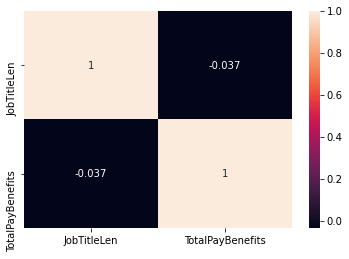

In [43]:
corr=df[['JobTitleLen', 'TotalPayBenefits']].corr()
ax1 = sns.heatmap(corr, annot=True)
plt.show()
# no correllation

------------------------------------------------------------------------------------------------------------

Task 2
------------
Apply data analysis on 'Ecommerce Purchases.csv' dataset.
here is some questions to think about

### What is the average Purchase Price?

In [45]:
pur_df = pd.read_csv('datasets/Ecommerce Purchases.csv')

In [46]:
pur_df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [47]:
pur_df['Purchase Price'].mean()

50.34730200000025

### What were the highest and lowest purchase prices?

In [48]:
print(pur_df['Purchase Price'].max())
pur_df['Purchase Price'].min()

99.99


0.0

### How many people have English 'en' as their Language of choice on the website?

In [49]:
pur_df[pur_df['Language'] == 'en']['Language'].count()

1098

### How many people have the job title of "Lawyer" ?

In [50]:
pur_df[pur_df['Job'].str.contains('Lawyer', case=False)].count()['Job']

30

### How many people made the purchase during the AM and how many people made the purchase during PM ?

In [51]:
pur_df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

### What are the 5 most common Job Titles?

In [52]:
pur_df['Job'].value_counts()[:5]

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: Job, dtype: int64

### Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?

In [77]:
pur_df[pur_df['Lot'] == '90 WT']['Purchase Price'].values[0]

75.1

### What is the email of the person with the following Credit Card Number: 4926535242672853

In [78]:
pur_df[pur_df['Credit Card'] == 4926535242672853]['Email'].values[0]

'bondellen@williams-garza.com'

### How many people have American Express as their Credit Card Provider and made a purchase above $95 ?

In [33]:
pur_df[(pur_df['CC Provider'] == 'American Express') & (pur_df['Purchase Price'] > 95)].count()['Email']

39

### Hard: How many people have a credit card that expires in 2025?

In [34]:
pur_df[pur_df['CC Exp Date'].str.contains('/25')]['CC Exp Date'].count()

1033

### Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...)

In [35]:
pur_df['Email Provider'] = pur_df['Email'].str.split('@',expand=True)[1]
pur_df['Email Provider'].value_counts()[:5]

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email Provider, dtype: int64